# 2021-09-08 Making acceleration-aware value estimates an optional assumption

Results below are for commit: 
    
(Rerunning the code below for other commits is not guaranteed to give the same results)

Based on the insight in the two most recent diary entries, I think both that acceleration-aware value estimates remain interesting, but if we are to use them then the possibility of a constant speed behaviour needs to be brought back into the picture. Therefore I have now done the following:

* Added an optional assumption `oVAa`, for acceleration-aware affordance-based value estimates. First, only affecting `SCAgent.get_access_order_values_for_agent_v02()`, where it controls whether the call to `sc_scenario_helper.get_access_order_implications()` considers accelerations in the predicted state of the other agent.
* Before moving on, as a sanity check, verified that I get back some previous results:
    * With `oVAa` and $T_\mathrm{O} = 2$ s, $\sigma_\mathrm{O} = 0.001$ m, I get seemingly exactly the same results as in the 2021-09-01 simulations for the baseline kinematics, with base model and when turning on first `oBEo` and then instead `oBEv`.
    * Without `oVAa`, and with $T_\mathrm{O} = 0.5$ s, $\sigma_\mathrm{O} = 0.01$ m, I get seemingly exactly the same results as in the 2021-08-26  simulations with baseline kinematics, with base model + `oBEo`. (The last simulations of this type before I started adding the acceleration-aware stuff).
* Added also an effect of `oVAa` in `SCAgent.do_action_update()`, where it enables the "constant speed" behaviour.

## Init

In [1]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

# imports needed to run the simulations
import numpy as np
import commotions
import sc_scenario
from sc_scenario import get_default_params, get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

C:\GITHUB\COMMOTIONSFramework


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:88: UserWarning: N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.
  warnings.warn('N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.')


## Unit tests, reproducing earlier results

Just the base model, no interaction

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


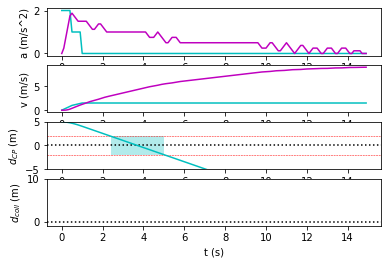

In [2]:
NAMES = ('P', 'V')
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [400, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 0))

optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = True, oBEo = False, oBEv = False, oAI = False, oEA = False)
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True, surplus_action_vals = False)

Baseline kinematics, base model.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


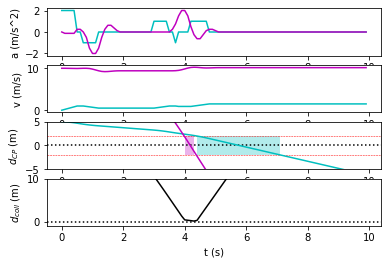

In [3]:
SPEEDS = np.array((0, 10))
PED_Y0 = -5
CONST_ACCS = (None, None)
AFF_VAL_FCN = True
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = False, oAI = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)


def run_baseline_kinematics(dist0s = (30, 40, 50), plot_beh_probs = False, 
                            plot_beh_activs = False, plot_beh_accs = False,
                            ped_snaps = None, veh_snaps = None):
    for dist0 in dist0s:
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = SCSimulation(
                CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = CONST_ACCS, params = params,
                snapshot_times = (ped_snaps, veh_snaps))
        sc_simulation.run()
        print('Initial car distance %d m:' % dist0)
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs, beh_accs = plot_beh_accs)

run_baseline_kinematics(dist0s = (40,))

## Without `oVAa`, with progressive additions of `oBEo`, `oBEv`, and `oAI`

Getting back the same results as 2021-08-26, ending with the nice assertive behaviour of the car in the third one:

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


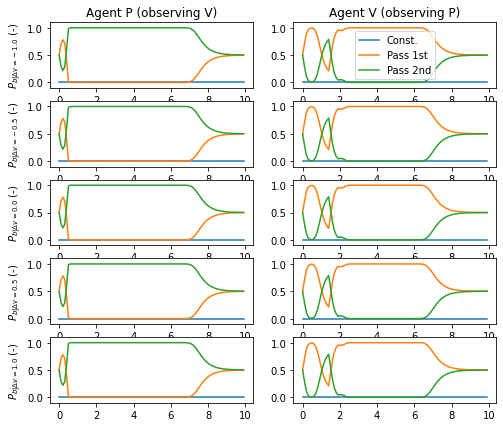

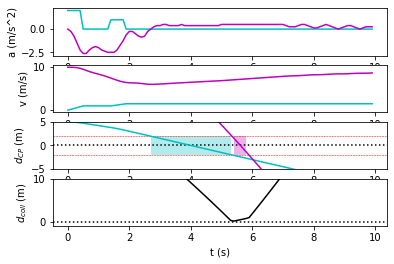

In [4]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = False, oBEo = True)
params.T_O = 0.5
params.sigma_O = 0.01
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


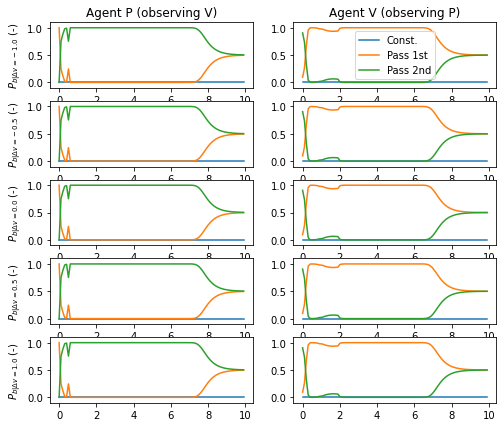

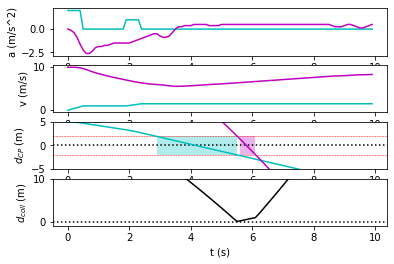

In [5]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = False, oBEo = True, oBEv = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


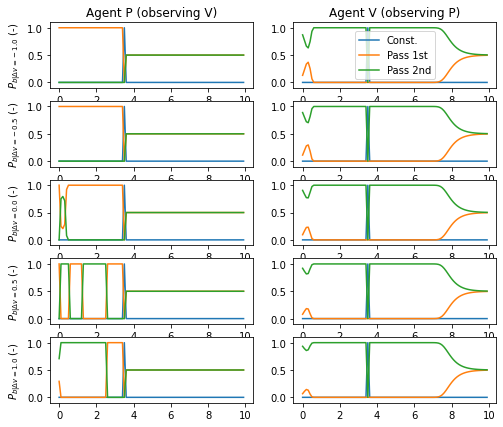

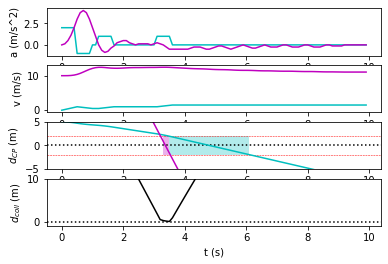

In [6]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = False, oBEo = True, oBEv = True, oAI = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

Just returning to the same parameter values as in the most recent diary entry, and rerunning with just `oBEo` (like in the first of the three above) modifies the behaviour a little, but not a lot:

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


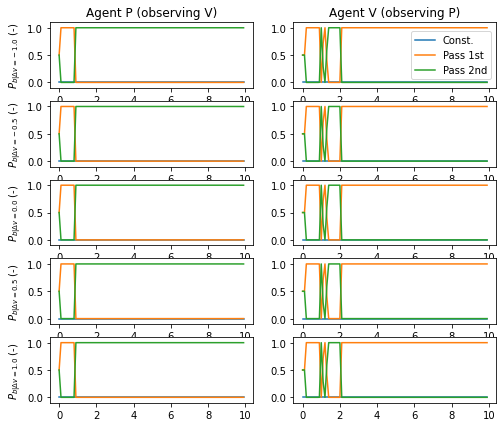

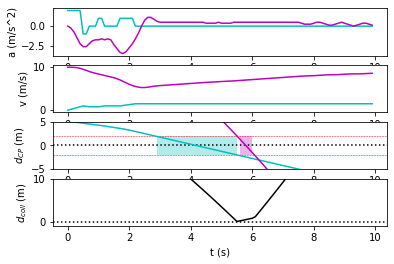

In [7]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = False, oBEo = True)
params.T_O = 2
params.sigma_O = 0.001
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## With `oVAa` and `oBEo`

Now turning on also `oVAa`, this introduces the possibility of a constant speed behaviour, which the pedestrian quickly decides that the vehicle is exhibiting, and thus the pedestrian yields.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


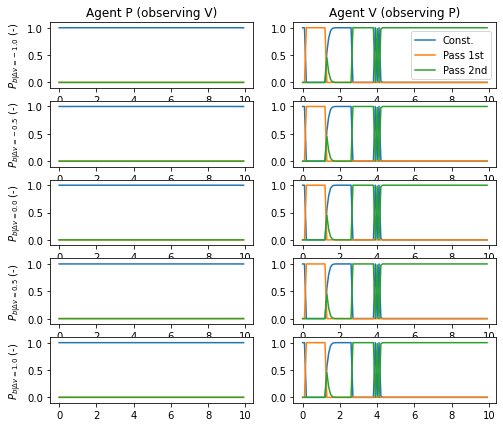

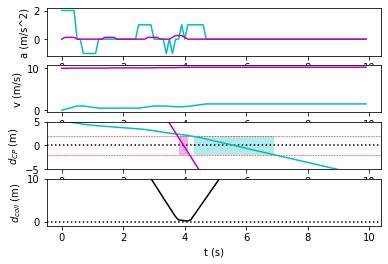

In [8]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = True, oBEo = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## With `oVAa` and `oBEv`

Instead enabling `oBEv`, here we see that the possibility of the constant speed behaviour now makes the vehicle realise that the pedestrian seems to be charging ahead, which prevents the collision outcome that I obtained for this same simulation in the 2021-09-01 entry:

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


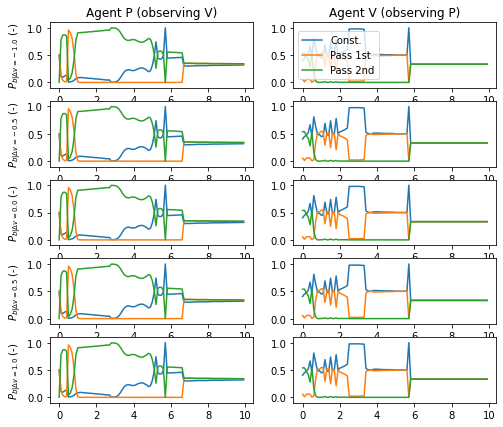

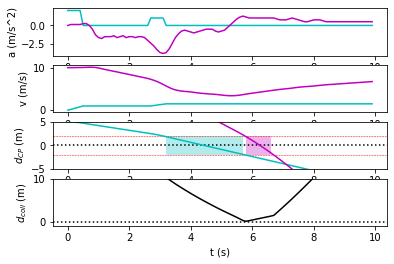

In [9]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = True, oBEo = False, oBEv = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## With `oVAa`, `oBEv`, and `oAI`

However, enabling `oAI` happens to give us a simulation that shows that the presence of the constant speed behaviour possibility doesn't remove the risk of collision outcomes. My understanding of what is happening below is that from around 1.5-2 s, both agents judge that the constant speed behaviour would give the other agent such a bad outcome, that there is no zero probability the other agent will adopt a constant speed behaviour, and since both agents reach that conclusion, both agents do in fact adopt a constant speed behaviour...

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:201: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


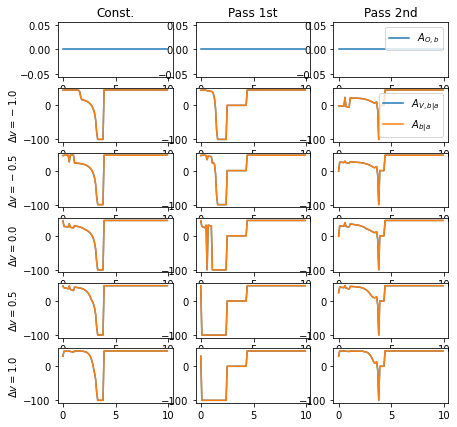

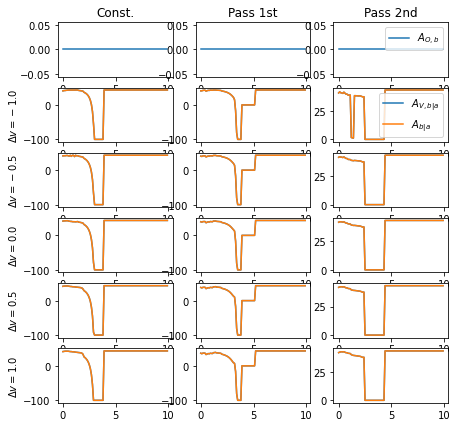

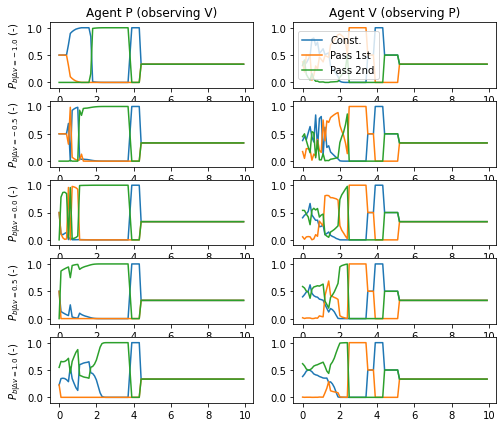

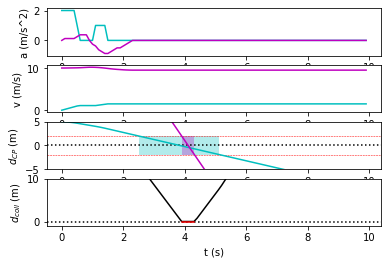

In [11]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oVAa = True, oBEo = False, oBEv = True, oAI = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True, plot_beh_activs = True)

So basically the acceleration-aware value estimation remains vulnerable to collision risk, even with consideration of a possible constant speed behaviour, if at any time the agents become overly confident about what behaviour the other agent is engaging in. 

But this doesn't necessarily sound like a bad thing - it might just mean that it is important to find the right model parameters, such that the model gets human-like beliefs about the behaviour of the other agent.

I think the next step here is to consider more closely how the `oBEv` and `oBEo` assumptions are mathematically defined in the model, especially with respect to how **much** influence `oBEv` can have, in situations where `oBEo` points very clearly in a different direction ("it doesn't make any rational sense that the other agent would do X, but it sure looks like they are doing X"). I think this is about:
* Probably introducing that value squashing sigmoid.
* Carefully thinking about the formulation of $P_{b|a}$, and how it can maybe be defined/constrained in ways so as to get sensible model beliefs.